In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()
df = pd.read_excel(r'C:\Users\HP\Desktop\University of Edinburgh\Junior 2nd sem\Programming for Economics\problem sets\2\UNPS_1112_PS2.xls')

Exercise 1

In [46]:
# ===== a =====
# Check if there are repeated hhids
duplicate_hhid = len(df['hhid'])-len(df['hhid'].drop_duplicates())
print("There are", duplicate_hhid, "repeated household identifiers.")

# count the number of observations
number_of_obs = len(df. index)
print("There are", number_of_obs, "observations in the data.")

There are 0 repeated household identifiers.
There are 2613 observations in the data.


       head_gender     head_age   familysize  consumption        income  \
count  2597.000000  2597.000000  2597.000000  2613.000000   2613.000000   
mean      1.314209    46.068156     7.480554  1803.792687   1860.075795   
std       0.464289    15.068960     3.712526  1308.742941   2607.517603   
min       1.000000    14.000000     1.000000   250.305506     27.486921   
25%       1.000000    34.000000     5.000000   918.324958    471.204368   
50%       1.000000    44.000000     7.000000  1426.614855   1061.194208   
75%       2.000000    56.000000     9.000000  2296.859516   2234.800590   
max       2.000000   100.000000    33.000000  8369.898484  52137.736864   

             wealth  
count   2613.000000  
mean    4912.698146  
std     8359.886497  
min        0.000000  
25%      720.019916  
50%     2108.598380  
75%     5221.939857  
max    76396.339917  

The table below shows the number of missing values in each variable:
   head_gender  head_age  familysize  consumption  incom

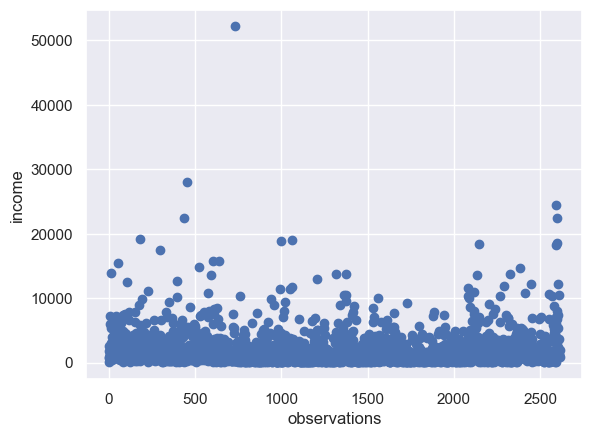

In [47]:
# ===== b =====
# summarize the data
sum_df = df[['head_gender', 'head_age', 'familysize', 'consumption','income', 'wealth']].describe()
print(sum_df)

# count the number of missing values in each of the variables across all observations
missing_head_gender = df['head_gender'].isna().sum()
missing_head_age = df['head_age'].isna().sum()
missing_familysize = df['familysize'].isna().sum()
missing_consumption = df['head_gender'].isna().sum()
missing_income = df['income'].isna().sum()
missing_wealth = df['wealth'].isna().sum()
missing_data = pd.DataFrame({'head_gender': pd.Series([missing_head_gender]),
                             'head_age': pd.Series([missing_head_age]),
                             'familysize': pd.Series([missing_familysize]),
                             'consumption': pd.Series([missing_consumption]),
                             'income': pd.Series([missing_income]),
                             'wealth': pd.Series([missing_wealth])})
print()
print("The table below shows the number of missing values in each variable:")
print(missing_data)
print()
print("We did an example graph below which shows an outlier in the income data: the only household with an income larger than 50k 2013 dollars.")

# create a list that contains observation numbers
numbers = []
for number in range(1, number_of_obs+1):
    numbers.append(number)
# plot the observations' wealth to see if there are potential outliers
fig, ax = plt.subplots()
ax.scatter(numbers, df['income'] )
ax.set_xlabel('observations')
ax.set_ylabel('income')
plt.show()

In [48]:
# ===== c =====
# drop the observations with the head_gender variable missing
df_gender = df.dropna(subset=['head_gender'])
number_of_obs_gender = len(df_gender. index)
print(number_of_obs - number_of_obs_gender, "observations are dropped.")

# create a gender dummy variable
df_gender['female'] = 1*(df_gender['head_gender']==2)

# count the number of observations that has female = 1
num_female = len(df_gender[df_gender["female"]==1])

# calculate the proportion of households where the head is female
proportion_female = round((num_female / number_of_obs_gender * 100), 3)
print("The proportion of households where the head is female is", proportion_female, "%.")

16 observations are dropped.
The proportion of households where the head is female is 31.421 %.


C:\Users\HP\AppData\Local\Temp\ipykernel_17968\2294867544.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender['female'] = 1*(df_gender['head_gender']==2)


In [49]:
# ===== d =====
# calculate the means of variables
avgs = df_gender[['consumption','familysize','head_age','female']].groupby(by="female").mean()
print(avgs)
print()
print("There is a", 1898-1593, "dollars difference in consumption between both groups that can noticeably affect other socioeconomical aspects of families. We can see that on average, female heads are 5 years older than male heads. The difference in family size is not significant.")


        consumption  familysize   head_age
female                                    
0       1898.303754    7.720943  44.388546
1       1593.261206    6.955882  49.734069

There is a 305 dollars difference in consumption between both groups that can noticeably affect other socioeconomical aspects of families. We can see that on average, female heads are 5 years older than male heads. The difference in family size is not significant.


Exercise 2. Inequality in Uganda

As we can see in the graph, both distributions resemble a normal distribution. The consumption data (blue line) is clustered around the mean while the income distribuition has higher variance, meaning the inequality is higher in income than in consumption.


D:\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


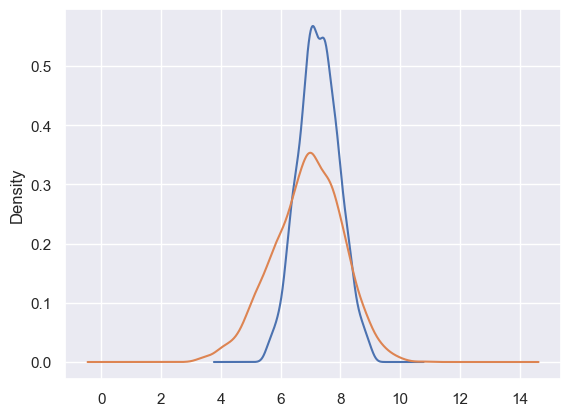

In [50]:
# ===== a =====
# create the log variables
df_log = df
df_log = df_log.drop(df_log[df_log.wealth==0].index)# drop those that are 0 because you can't take log zero.
df_log['log_c'] = np.log(df["consumption"])
df_log['log_inc'] = np.log(df["income"])
df_log['log_w'] = np.log(df["wealth"])
# print(df_log)

# plot the two variables distributions on the same graph
df_log['log_c'].plot(kind='kde') 
df_log['log_inc'].plot(kind='kde')
print ("As we can see in the graph, both distributions resemble a normal distribution. The consumption data (blue line) is clustered around the mean while the income distribuition has higher variance, meaning the inequality is higher in income than in consumption.")

In [51]:
# ===== b =====
# compute the variance of the logs
var_log_c = round(np.var(df_log['log_c']), 3)
var_log_inc = round(np.var(df_log['log_inc']), 3)
var_log_w = round(np.var(df_log['log_w']), 3)

print("The variance of log_c is", var_log_c)
print("The variance of log_inc is", var_log_inc)
print("The variance of log_w is", var_log_w)
print()
print("Comparing to US data, the consumption variance is higher in the US than in Uganda, 0.79 compared to 0.446. The variance in income and wealth is higher in Uganda than in the US, 1.34 vs 0.97 and 2.68 vs 2.11 respectively.")

The variance of log_c is 0.446
The variance of log_inc is 1.338
The variance of log_w is 2.676

Comparing to US data, the consumption variance is higher in the US than in Uganda, 0.79 compared to 0.446. The variance in income and wealth is higher in Uganda than in the US, 1.34 vs 0.97 and 2.68 vs 2.11 respectively.


In [52]:
# ===== c =====
# compute the averages of consumption, income, and wealth by regions
region_avgs = df_log[['consumption','income','wealth','urban']].groupby(by="urban").mean()
print(region_avgs)
print()
print("The consumption and income in urban areas is roughly 800 US dollars higher than rural areas, and wealth is approximately 2000 dollars higher.")

       consumption       income       wealth
urban                                       
0      1627.313595  1714.775035  4533.857241
1      2523.968738  2456.992260  6711.015029

The consumption and income in urban areas is roughly 800 US dollars higher than rural areas, and wealth is approximately 2000 dollars higher.


In [53]:
# ===== d =====
# compute the variance of the logs by regions
region_avgs_log = df_log[['log_c','log_inc','log_w','urban']].groupby(by="urban").var()
print(region_avgs_log)

          log_c   log_inc     log_w
urban                              
0      0.412732  1.345282  2.388743
1      0.435240  1.101915  3.920238


In [54]:
# ===== e =====
#define function to calculate the Gini coefficient
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))
print ("The Gini coefficient in consumption is", round(gini(df.consumption), 3))
print ("The Gini coefficient in income is", round(gini(df.income), 3))
print ("The Gini coefficient in wealth is", round(gini(df.wealth), 3))
print()
print("According to the Gini coefficient, the consumption and wealth inequality is higher in the US, and income inequality is higher in Uganda. ")

The Gini coefficient in consumption is 0.366
The Gini coefficient in income is 0.556
The Gini coefficient in wealth is 0.657

According to the Gini coefficient, the consumption and wealth inequality is higher in the US, and income inequality is higher in Uganda. 


In [55]:
# ===== f =====
# sum up the wealth of all observations
total_wealth = df['wealth'].sum()

# find the point of the percentiles
fifty_percentile = df_log.wealth.quantile(0.5)
ninty_percentile = df_log.wealth.quantile(0.9)
ninty_five_percentile = df_log.wealth.quantile(0.95)
ninty_nine_percentile = df_log.wealth.quantile(0.99)

# sum up the wealth of the respective percentage and calculate its share of the total wealth
bottom_fifty = round(df.loc[df['wealth'] <= fifty_percentile, 'wealth'].sum() / total_wealth * 100, 3)
top_ten = round(df.loc[df['wealth'] >= ninty_percentile, 'wealth'].sum() / total_wealth * 100, 3)
top_five = round(df.loc[df['wealth'] >= ninty_five_percentile, 'wealth'].sum() / total_wealth * 100, 3)
top_one = round(df.loc[df['wealth'] >= ninty_nine_percentile, 'wealth'].sum() / total_wealth * 100, 3)

print("The bottom 50 percent hold", bottom_fifty, "% of the welath; the top 10 percent hold", top_ten, "%; the top 5 percent hold", top_five, "%; and the top 1 percent hold", top_one, "%.")

The bottom 50 percent hold 8.359 % of the welath; the top 10 percent hold 50.922 %; the top 5 percent hold 35.089 %; and the top 1 percent hold 11.559 %.


Part G:

From our results, we can clearly see that inequality in low-income countries is also a reality and this is sometimes neglected. 

According to the gini coefficients, the inequality in consumption is below 0.4 (we know that consumption doesn't increase much after a certain threshold even if income increases), but the wealth and income inequality is high, roughly 0.6.

It is also important to reduce inequality in low-income countries to enhance a sustainable development and economic growth. This can only be solved when basic infrastructure and living necessities are covered alongside an increase in the quality of education. 

Differences in income will only get worse over time if it's not taken care of. Low-income countries with high level of income inequality are more likely to be threaten by corruption than developed countries and this will further impact the first points brought up earlier, infrastructures and education.

Part h:

From our results, consumption as a measure of inequality might not be the best choice. As commented above, consumption takes a smaller share as income increases and this might underestimate the inequality in Africa. 

Exercise 3. The life-cycle of male vs female head households in Uganda 

In [56]:
# drop some data and smooth
df_ex3 = df_log[df_log['head_age'] < 80]
df_ex3 = df_log[df_log['head_age'] >18]
bins = [18, 30, 40, 50, 60, 80]
labels = [25, 35, 45, 55, 70]
df_ex3['age_bins'] = pd.cut(df_ex3['head_age'],bins=bins, labels=labels)

C:\Users\HP\AppData\Local\Temp\ipykernel_17968\4252486379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex3['age_bins'] = pd.cut(df_ex3['head_age'],bins=bins, labels=labels)


<AxesSubplot:xlabel='age_bins', ylabel='log_c'>

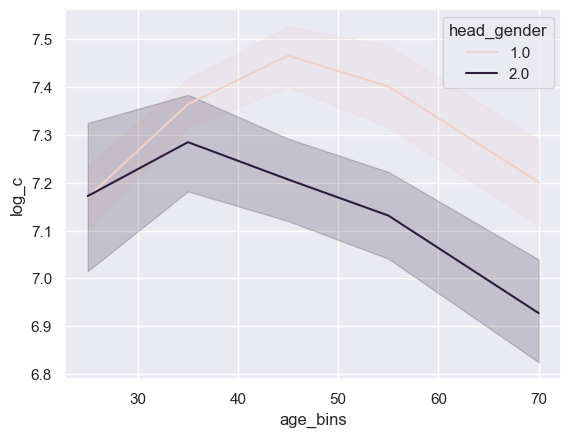

In [57]:
# ===== a =====
# plot the lifecycle of the log of consumption
fig, ax = plt.subplots()
sns.lineplot(x="age_bins", y="log_c", hue="head_gender", data=df_ex3)

<AxesSubplot:xlabel='age_bins', ylabel='log_inc'>

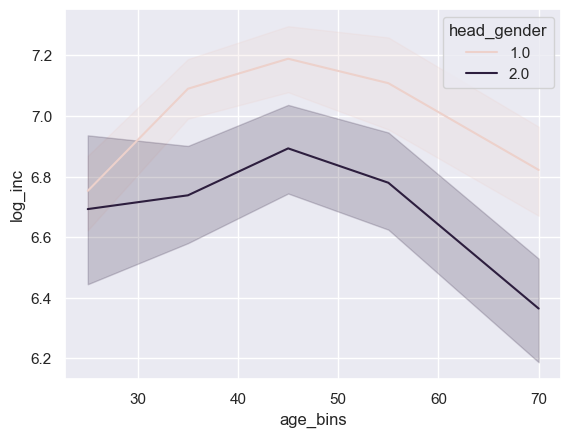

In [58]:
# ===== b =====
# plot the lifecycle of the log of income
fig, ax = plt.subplots()
sns.lineplot(x="age_bins", y="log_inc", hue="head_gender", data=df_ex3)

<AxesSubplot:xlabel='age_bins', ylabel='log_w'>

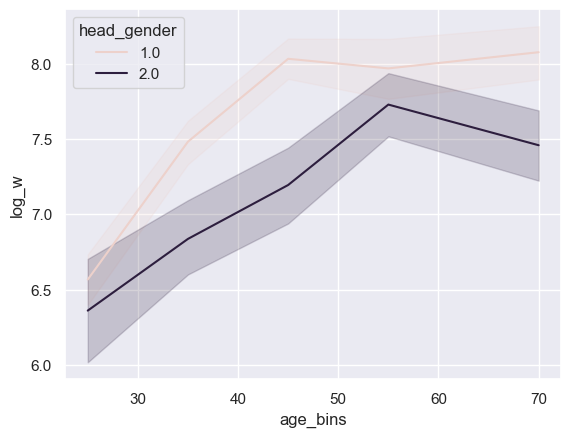

In [59]:
# ===== c =====
# plot the lifecycle of the log of wealth
fig, ax = plt.subplots()
sns.lineplot(x="age_bins", y="log_w", hue="head_gender", data=df_ex3)

Part d

When the family head is male (1), consumption, income and wealth is higher than when the family head is female at all ages. It's worth mentioning that consumption and income have the same pattern for both genders but wealth increases for female heads at a later age, roughly 55.